In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
from datetime import datetime  
from shapely.geometry import Point  
from geopandas.tools import geocode 
from geopandas.tools import reverse_geocode

%matplotlib inline

In [3]:
location = "datasets/datasets/hurricaneMichael.csv"

In [6]:
hurricane_df = pd.read_csv("datasets/hurricaneMichael.csv")
hurricane_df.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,10/06/2018 17:00,18.0,86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven
1,1A,10/06/2018 20:00,18.3,86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila
2,2,10/06/2018 23:00,18.8,86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila
3,2A,10/07/2018 02:00,18.4,87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg
4,3,10/07/2018 05:00,18.6,86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg


In [7]:
hurricane_df.dtypes

AdvisoryNumber     object
Date               object
Lat               float64
Long              float64
Wind                int64
Pres                int64
Movement           object
Type               object
Name               object
Received           object
Forecaster         object
dtype: object

In [12]:
hurricane_df = hurricane_df.loc[(hurricane_df['Lat'].notnull()) & hurricane_df['Long'].notnull()]
hurricane_df.count()

AdvisoryNumber    45
Date              45
Lat               45
Long              45
Wind              45
Pres              45
Movement          45
Type              45
Name              45
Received          45
Forecaster        45
dtype: int64

In [13]:
hurricane_df['Wind'] = list(hurricane_df[['Lat', 'Long']].values)

In [14]:
hurricane_df.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,10/06/2018 17:00,18.0,86.6,"[18.0, 86.6]",1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven
1,1A,10/06/2018 20:00,18.3,86.6,"[18.3, 86.6]",1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila
2,2,10/06/2018 23:00,18.8,86.6,"[18.8, 86.6]",1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila
3,2A,10/07/2018 02:00,18.4,87.1,"[18.4, 87.1]",1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg
4,3,10/07/2018 05:00,18.6,86.9,"[18.6, 86.9]",1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg


In [23]:
hurricane_df['Date'] = list(hurricane_df[['Wind', 'Pres']].values)

In [24]:
hurricane_df.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,"[[18.0, 86.6], 1006]",18.0,86.6,"[18.0, 86.6]",1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven
1,1A,"[[18.3, 86.6], 1004]",18.3,86.6,"[18.3, 86.6]",1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila
2,2,"[[18.8, 86.6], 1004]",18.8,86.6,"[18.8, 86.6]",1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila
3,2A,"[[18.4, 87.1], 1004]",18.4,87.1,"[18.4, 87.1]",1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg
4,3,"[[18.6, 86.9], 1004]",18.6,86.9,"[18.6, 86.9]",1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg


In [29]:
hurricane_df['Lat'] = hurricane_df['Long']
hurricane_df.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,"[[18.0, 86.6], 1006]",86.6,86.6,"[18.0, 86.6]",1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven
1,1A,"[[18.3, 86.6], 1004]",86.6,86.6,"[18.3, 86.6]",1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila
2,2,"[[18.8, 86.6], 1004]",86.6,86.6,"[18.8, 86.6]",1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila
3,2A,"[[18.4, 87.1], 1004]",87.1,87.1,"[18.4, 87.1]",1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg
4,3,"[[18.6, 86.9], 1004]",86.9,86.9,"[18.6, 86.9]",1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg


In [30]:
map_df.plot()

NameError: name 'map_df' is not defined

In [31]:
filepath = "datasets/continents.json"

#data contains polygon shape coordinates for different map body types (continents, etc.)
map_df = gpd.read_file(filepath)
map_df.head()

,CONTINENT,geometry
0,Asia,(POLYGON ((93.27554321289063 80.26361083984375...
1,North America,(POLYGON ((-25.28166961669922 71.3916625976562...
2,Europe,(POLYGON ((58.06137847900391 81.68775939941406...
3,Africa,(POLYGON ((0.694651007652283 5.773365020751953...
4,South America,(POLYGON ((-81.71305847167969 12.4902763366699...


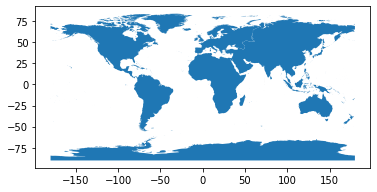

In [32]:
map_df.plot()

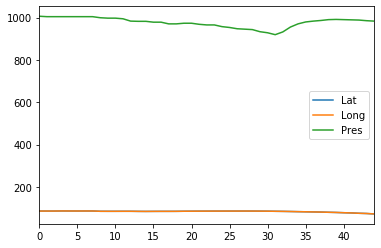

In [33]:
hurricane_df.plot()

Text(0.5, 1, 'Hurricane Michael')

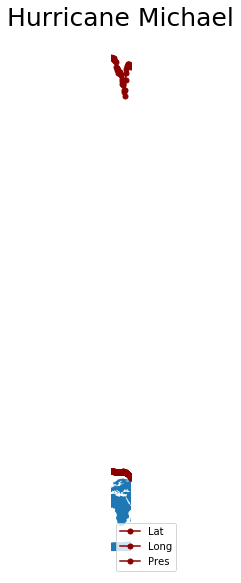

In [35]:
fig, ax = plt.subplots(1, figsize=(15,10))

#this is the map
basemap = map_df.plot(ax=ax)

#plot coordinates on top of map graph
hurricane_df.plot(ax=basemap, color='darkred', marker=".", markersize=10)

#take off axis numbers
ax.axis('off')

#put title on map
ax.set_title("Hurricane Michael", fontsize=25, fontweight=3)

In [36]:
filepath = "datasets/datasets/US_states(5m).json"

map_df = gpd.read_file(filepath)
map_df.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"(POLYGON ((-88.124658 30.28364, -88.0868119999..."
1,0400000US02,02,Alaska,,570640.950,"(POLYGON ((-166.10574 53.988606, -166.075283 5..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.538593 37.000674, -112.534545 3..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.042964 33.019219, -94.043036 33...."
4,0400000US06,06,California,,155779.220,"(POLYGON ((-122.421439 37.869969, -122.421341 ..."


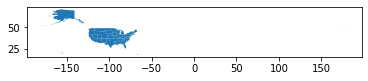

In [37]:
map_df.plot()

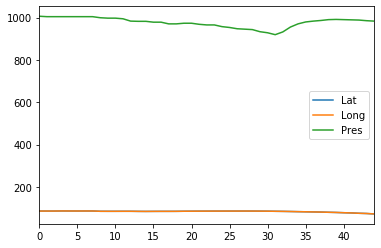

In [38]:
hurricane_df.plot()

Text(0.5, 1, 'Hurricane Michael')

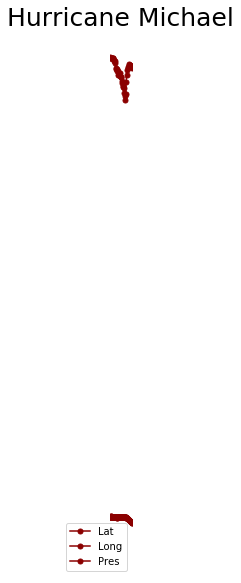

In [39]:
fig, ax = plt.subplots(1, figsize=(15,10))

#this is the map
basemap = map_df.plot(ax=ax)

#plot coordinates on top of map graph
hurricane_df.plot(ax=basemap, color='darkred', marker=".", markersize=10)

#take off axis numbers
ax.axis('off')

#put title on map
ax.set_title("Hurricane Michael", fontsize=25, fontweight=3)

Text(0.5, 1, 'Hurricane Michael')

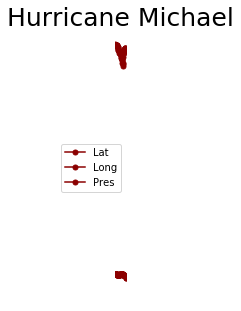

In [40]:
fig, ax = plt.subplots(1, figsize=(10,5))

#this is the map
basemap = map_df.plot(ax=ax)

#plot coordinates on top of map graph
hurricane_df.plot(ax=basemap, color='darkred', marker=".", markersize=10)

#take off axis numbers
ax.axis('off')

#put title on map
ax.set_title("Hurricane Michael", fontsize=25, fontweight=3)

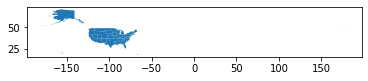

In [44]:
map_df.plot()

Text(0.5, 1, 'Hurricane Michael')

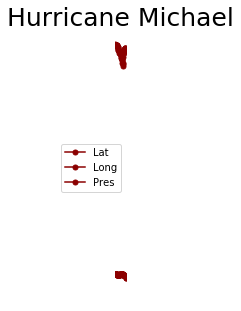

In [45]:
fig, ax = plt.subplots(1, figsize=(10,5))

#this is the map
basemap = map_df.plot(ax=ax)

#plot coordinates on top of map graph
hurricane_df.plot(ax=basemap, color='darkred', marker=".", markersize=10)

#take off axis numbers
ax.axis('off')

#put title on map
ax.set_title("Hurricane Michael", fontsize=25, fontweight=3)